In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.Tensor(2,3)


 1.3273e+08  4.5555e-41 -1.4250e+30
 3.0903e-41  4.4842e-44  0.0000e+00
[torch.FloatTensor of size 2x3]

In [4]:
torch.randn(2,3)


-0.2652 -0.8200 -0.0153
 0.1310  0.2137  1.4896
[torch.FloatTensor of size 2x3]

In [5]:
torch.Tensor(2,3) * torch.randn(2,3)


-1.5790e+08 -1.5018e-41 -2.2838e+30
 2.8177e-41 -2.2421e-44  0.0000e+00
[torch.FloatTensor of size 2x3]

In [6]:
torch.randn(2,3).size()

torch.Size([2, 3])

In [7]:
x = torch.rand(2,3)

In [8]:
x.add(2)


 2.9490  2.8854  2.3557
 2.9591  2.8917  2.4042
[torch.FloatTensor of size 2x3]

In [9]:
x.view(6).size()

torch.Size([6])

In [10]:
import torch
from torch.autograd import Variable

In [11]:
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)


Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [12]:
y = x + 2
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [13]:
y.grad_fn

In [14]:
y

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

In [15]:
z = y*y*3

In [16]:
out = z.mean()

In [17]:
out

Variable containing:
 27
[torch.FloatTensor of size 1]

In [18]:
out.backward()

In [19]:
x.grad

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]

In [35]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [42]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)

        # Affine transformation y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    def num_flat_features(self, x):
        num_features = 1
        size = x.size()[1:]
        for s in size:
            num_features *= s
        return num_features

In [43]:
net = Net()

In [44]:
print(net)

Net(
  (conv1): Conv2d (1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


In [47]:
params = list(net.parameters())

In [48]:
len(params)

10

In [51]:
for item in params:
    print (item.size())

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([16, 6, 5, 5])
torch.Size([16])
torch.Size([120, 400])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([10, 84])
torch.Size([10])


In [103]:
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
print(out)

Variable containing:
-0.0292  0.0411  0.0524 -0.0732  0.0030 -0.0184  0.0335  0.0535  0.1389  0.1111
[torch.FloatTensor of size 1x10]



In [104]:
net.zero_grad()

In [105]:
out.backward(torch.randn(1, 10))

In [106]:
output = net(input)
target = Variable(torch.arange(1, 11))  # a dummy target, for example
criterion = nn.MSELoss()

In [107]:
loss = criterion(output, target)
print(loss)

Variable containing:
 37.9356
[torch.FloatTensor of size 1]



In [108]:
net.zero_grad()
loss.backward()

In [109]:
net.conv1.bias.grad

Variable containing:
-0.0223
 0.0003
 0.0425
 0.0244
-0.1367
-0.0225
[torch.FloatTensor of size 6]

In [110]:
import torch.optim as optim

In [111]:
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [112]:
optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()

### Training an image classifier

In [116]:
import torch
import torchvision
import torchvision.transforms as transforms

In [121]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5, 0.5, 0.5), 
                                                     (0.5, 0.5, 0.5))]
                              )
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [122]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [137]:
trainloader

 bird  frog  frog plane


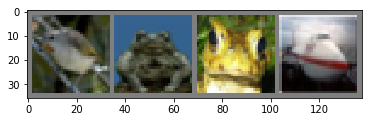

Process Process-4:
Process Process-3:
Traceback (most recent call last):
  File "/home/raja/anaconda3/envs/opennmt/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/raja/anaconda3/envs/opennmt/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/raja/anaconda3/envs/opennmt/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/raja/anaconda3/envs/opennmt/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 36, in _worker_loop
    r = index_queue.get()
  File "/home/raja/anaconda3/envs/opennmt/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/raja/anaconda3/envs/opennmt/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 36, in _worker_loop
    r = index_queue.get()
  File "/home/raja/anaconda3/envs/opennmt/

In [130]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [159]:
from torch.autograd import variable
import torch.nn as nn
import torch.nn.functional as F

In [160]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

In [161]:
net = Net()

In [162]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [143]:
%%time
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')



[1,  2000] loss: 2.155
[1,  4000] loss: 1.873
[1,  6000] loss: 1.688
[1,  8000] loss: 1.578
[1, 10000] loss: 1.522
[1, 12000] loss: 1.458
[2,  2000] loss: 1.411
[2,  4000] loss: 1.377
[2,  6000] loss: 1.376
[2,  8000] loss: 1.352
[2, 10000] loss: 1.322
[2, 12000] loss: 1.299
Finished Training
CPU times: user 4min 21s, sys: 6.62 s, total: 4min 28s
Wall time: 1min 35s


GroundTruth:    dog   dog   cat   dog


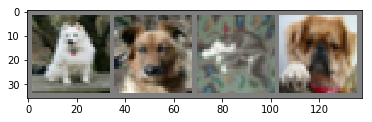

In [144]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [145]:
outputs = net(Variable(images))

In [148]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


Predicted:    dog  frog  bird   dog


In [149]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [150]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 68 %
Accuracy of   car : 82 %
Accuracy of  bird : 42 %
Accuracy of   cat : 25 %
Accuracy of  deer : 27 %
Accuracy of   dog : 64 %
Accuracy of  frog : 65 %
Accuracy of horse : 60 %
Accuracy of  ship : 55 %
Accuracy of truck : 51 %


In [163]:
net.cuda()

Net(
  (conv1): Conv2d (3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)

In [164]:
%%time
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.235
[1,  4000] loss: 1.893
[1,  6000] loss: 1.686
[1,  8000] loss: 1.626
[1, 10000] loss: 1.550
[1, 12000] loss: 1.496
[2,  2000] loss: 1.426
[2,  4000] loss: 1.409
[2,  6000] loss: 1.369
[2,  8000] loss: 1.347
[2, 10000] loss: 1.321
[2, 12000] loss: 1.311
Finished Training
CPU times: user 1min 5s, sys: 7.43 s, total: 1min 12s
Wall time: 1min 20s
